data/data.csv
有重複資料
562 => 522

In [3]:
import time
import pickle

import statistics

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib
import matplotlib.pyplot as plt

from itertools import combinations

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import f1_score

from libsvm.svmutil import svm_problem
from libsvm.svmutil import svm_parameter
from libsvm.svmutil import svm_train
from libsvm.svmutil import svm_predict
from libsvm.svmutil import evaluations

In [2]:
from Features.dle import dle

In [23]:
l = np.load("data/log/kmers_cv_msvm_f10s400.npy")
l = pd.DataFrame(l)

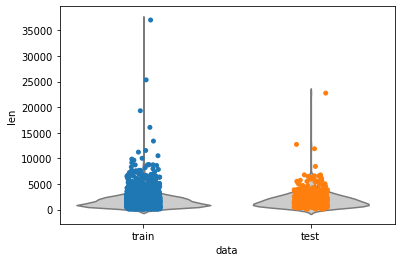

In [26]:
import seaborn as sns

df_train = pd.read_csv("data/linear_features/cdhit80_data_seq_loc75_train.csv")
df_test = pd.read_csv("data/linear_features/cdhit80_data_seq_loc75_test.csv")

df_train["data"] = "train"
df_train["len"] = df_train["Sequence"].str.len()
df_test["data"] = "test"
df_test["len"] = df_test["Sequence"].str.len()
df = df_train.append(df_test)
# print(df_train["Sequence"].str.len().to_numpy())
ax = sns.violinplot(x="data", y="len", data=df, inner=None, color=".8")
ax = sns.stripplot(x="data", y="len", data=df)

In [15]:
# data_x = np.load("data/linear_features/linear/k3p10nor3.npy")
# data_x = data_x.reshape(data_x.shape[0],-1)
data_x = np.genfromtxt("data/Pse_in_One2/DNA/cdhit80_data_seq_loc75_PCPseDNCGeneral_all_index.csv", delimiter=',')
data_y = np.load("data/linear_features/data_y.npy")

comb_num = 2

for i in range(2, comb_num + 1):
    combins = [c for c in combinations(range(data_x.shape[1]), i)]
    for c in combins:
        x_train, x_test, y_train, y_test = train_test_split(data_x[:, c], data_y, test_size=0.20, shuffle=True, random_state=12)
        
        macro = cv_msvm_score(data_x[:, c], data_y, 10)
        print(macro)
        break
    break

Accuracy = 36.6337% (111/303) (classification)
Accuracy = 70.9571% (215/303) (classification)
Accuracy = 54.7855% (166/303) (classification)
Accuracy = 22.4422% (68/303) (classification)
Accuracy = 25.7426% (78/303) (classification)
Accuracy = 26.0726% (79/303) (classification)
Accuracy = 63.6964% (193/303) (classification)
Accuracy = 68.3168% (207/303) (classification)
Accuracy = 24.0924% (73/303) (classification)
Accuracy = 70.9571% (215/303) (classification)
Accuracy = 11.2211% (34/303) (classification)
Accuracy = 7.26073% (22/303) (classification)
Accuracy = 36.9637% (112/303) (classification)
Accuracy = 24.0924% (73/303) (classification)
Accuracy = 56.7657% (172/303) (classification)
Accuracy = 66.0066% (200/303) (classification)
Accuracy = 29.703% (90/303) (classification)
Accuracy = 7.92079% (24/303) (classification)
Accuracy = 19.1419% (58/303) (classification)
Accuracy = 40.9241% (124/303) (classification)
Accuracy = 27.0627% (82/303) (classification)
Accuracy = 33.6634% (102/

In [44]:
merge_df = None
for i in range(1, 6):
    if i != 2:
        print(i)    
        l = np.load("data/log/pseinone_cv_msvm_f10s"+str(i)+"00.npy")
        df = pd.DataFrame(l, columns=["file name", "Feature num", "time", "s" + str(i) + "00"]).drop(['time'], axis=1)
        if merge_df is None:
            merge_df = df
        else:
            merge_df = merge_df.merge(df, how="inner", on=["file name", "Feature num"])
        print(merge_df)

1
                                        file name Feature num  \
0             cdhit80_data_seq_loc75_aucg_DAC.csv          12   
1             cdhit80_data_seq_loc75_aucg_DCC.csv          60   
2             cdhit80_data_seq_loc75_aucg_MAC.csv           6   
3           cdhit80_data_seq_loc75_aucg_NMBAC.csv           6   
4        cdhit80_data_seq_loc75_aucg_PCPseDNC.csv          18   
5        cdhit80_data_seq_loc75_aucg_SCPseDNC.csv          28   
6   cdhit80_data_seq_loc75_aucg_mismatch_k3m2.csv          64   
7   cdhit80_data_seq_loc75_aucg_mismatch_k3m1.csv          64   
8   cdhit80_data_seq_loc75_aucg_mismatch_k2m1.csv          16   
9   cdhit80_data_seq_loc75_aucg_mismatch_k4m1.csv         256   
10  cdhit80_data_seq_loc75_aucg_mismatch_k4m2.csv         256   
11  cdhit80_data_seq_loc75_aucg_mismatch_k4m3.csv         256   

                  s100  
0   0.5128660984767431  
1   0.5072936004412559  
2   0.5063051040027182  
3   0.5278744563234673  
4   0.5276809130144483  
5 

In [45]:
merge_df

,file name,Feature num,s100,s300,s400,s500
0,cdhit80_data_seq_loc75_aucg_DAC.csv,12,0.5128660984767431,0.5100754700191429,0.5102172481495371,0.5141344974862114
1,cdhit80_data_seq_loc75_aucg_DCC.csv,60,0.5072936004412559,0.5230904220652739,0.5167782251656581,0.5185874351177008
2,cdhit80_data_seq_loc75_aucg_MAC.csv,6,0.5063051040027182,0.5169694091636836,0.5218805519251428,0.5120965341272589
3,cdhit80_data_seq_loc75_aucg_NMBAC.csv,6,0.5278744563234673,0.5101814070731246,0.5137357065906978,0.5188606513114926
4,cdhit80_data_seq_loc75_aucg_PCPseDNC.csv,18,0.5276809130144483,0.5281172284270939,0.5278228233261137,0.5266922868886255
5,cdhit80_data_seq_loc75_aucg_SCPseDNC.csv,28,0.5249747533771816,0.5312880052329818,0.5304034481654387,0.5274557634176709
6,cdhit80_data_seq_loc75_aucg_mismatch_k3m2.csv,64,0.5033782590040635,0.5032022159965674,0.5030236490749854,0.503200323061003
7,cdhit80_data_seq_loc75_aucg_mismatch_k3m1.csv,64,0.503201585018046,0.5030230180964639,0.502845713131925,0.503201585018046
8,cdhit80_data_seq_loc75_aucg_mismatch_k2m1.csv,16,0.503201585018046,0.5030249110320285,0.5030242800535069,0.503736023825749
9,cdhit80_data_seq_loc75_aucg_mismatch_k4m1.csv,256,0.5049790515130865,0.5055147522778325,0.5055147522778325,0.504623810605487


In [14]:
import math

from sklearn import metrics

from libsvm.svmutil import svm_problem
from libsvm.svmutil import svm_parameter
from libsvm.svmutil import svm_train
from libsvm.svmutil import svm_predict

class multi_SVM():
    def __init__(self, class_weight='None'):
        self.class_weight = class_weight
        self.model_array = None
    
    def train(self, x, y, size=1, parameter=""):
        if self.class_weight == 'balanced':
            data = None
            label = None
            for i in range(size):
                d, l = self.balanced_data(x, y)
                if data is None:
                    data = d
                    label = l
                else:
                    data = np.append(data, d, axis=0)
                    label = np.append(label, l, axis=0)
        
        model_array = []
        for d, l in zip(data, label):
            arr = np.arange(len(l))
            np.random.shuffle(arr)
            d = d[arr]
            l = l[arr]

            prob = svm_problem(l, d)
            param = svm_parameter(parameter)
            m = svm_train(prob, param)
            model_array.append(m)
        
        self.model_array = model_array
        
        return None
    
    def test(self, x, y):
        output = None
        for m in self.model_array:
            p_label, p_acc, p_val = svm_predict(y, x, m)
            if output is None:
                output = np.array([p_label])
            else:
                output = np.append(output, np.array([p_label]), axis=0)
        
        pred_y = []
        for o in output.T:
            u, c = np.unique(o, return_counts=True)
            pred_y.append(u[c == c.max()][0])
        
        return metrics.roc_auc_score(y, pred_y)
    
    def predict(self, x):
        output = None
        for m in self.model_array:
            p_label, p_acc, p_val = svm_predict([], x, m)
            if output is None:
                output = np.array([p_label])
            else:
                output = np.append(output, np.array([p_label]), axis=0)
        
        pred_y = []
        for o in output.T:
            u, c = np.unique(o, return_counts=True)
            pred_y.append(u[c == c.max()][0])
        
        return pred_y
    
    def balanced_data(self, x, y):
        unique, count = np.unique(y, return_counts=True)
        min_count = min(count)
        big_batch = math.ceil(max(count) / min_count)
        min_u = np.where(count == min_count, unique, -1)
        
        data = None
        label = None
        for u in unique:
            u_data = None
            if not u in min_u:
                while u_data is None or len(u_data) != big_batch * min_count:
                    x_u = x[y == u]
                    np.random.shuffle(x_u)
                    mod = len(x_u) % min_count
                    if mod != 0:
                        arr = np.arange(len(x_u) - mod)
                        np.random.shuffle(arr)
                        x_u = np.append(x_u, x_u[arr[mod - min_count:]], axis=0)
                    if u_data is None:
                        u_data = x_u
                    else:
                        u_data = np.append(u_data, x_u[:(big_batch * min_count) - len(u_data)], axis=0)
                u_data = np.array(np.split(u_data, big_batch))
            else:
                x_u = x[y == u]
                x_u = np.expand_dims(x_u, axis=0)
                u_data = np.repeat(x_u, big_batch, axis=0)

            if data is None:
                data = u_data
                label = np.full((big_batch, min_count), u)
            else:
                data = np.append(data, u_data, axis=1)  
                label = np.append(label, np.full((big_batch, min_count), u), axis=1)

        return data, label

def CV(x, y, folder):
    unique, count = np.unique(y, return_counts=True)
    cv_x = []
    cv_y = []
    for u in unique:
        u_x = x[y == u]
        u_y = y[y == u]
        arr = np.arange(len(u_x))
        np.random.shuffle(arr)
        u_x = u_x[arr]
        u_y = u_y[arr]
        
        linspace = np.linspace(0, len(u_x), folder + 1, dtype=int)
        
        for i in range(folder):
            if unique[0] == u:
                cv_x.append(u_x[linspace[i]:linspace[i+1]])
                cv_y.append(u_y[linspace[i]:linspace[i+1]])
            else:
                cv_x[i] = np.append(cv_x[i], u_x[linspace[i]:linspace[i+1]], axis=0)
                cv_y[i] = np.append(cv_y[i], u_y[linspace[i]:linspace[i+1]], axis=0)
    return cv_x, cv_y

def cv_msvm_score(x, y, folder, size=15, parameter=""):
    cv_x, cv_y = CV(x, y, folder)
    score_array = []
    for j in range(len(cv_x)):
        train_x = None
        for i in range(len(cv_x)):
            if i == j :
                test_x = cv_x[i]
                test_y = cv_y[i]
            else:
                if train_x is None:
                    train_x = cv_x[i]
                    train_y = cv_y[i]
                else:
                    train_x = np.append(train_x, cv_x[i], axis=0)
                    train_y = np.append(train_y, cv_y[i], axis=0)
        msvm = multi_SVM(class_weight='balanced')
        msvm.train(train_x, train_y, size=size, parameter=parameter)
        score_array.append(msvm.test(test_x, test_y))
    return score_array


In [3]:
data_x = np.load("data/linear_features/linear/k3p10nor3.npy")
data_x = data_x.reshape(data_x.shape[0],-1)
data_y = np.load("data/linear_features/data_y.npy")
macro_np = None
for i in range(data_x.shape[1]):
    # x_train, x_test, y_train, y_test = train_test_split(data_x[:, i, :], data_y, test_size=0.20, shuffle=True, random_state=12)
    
    # prob = svm_problem(y_train, x_train)
    # param = svm_parameter('')
    # m = svm_train(prob, param)
    # p_label, p_acc, p_val = svm_predict(y_test, x_test, m)
    # macro = f1_score(p_label, y_test, average='macro')
    
    # msvm = multi_SVM(class_weight='balanced')
    # msvm.train(x_train, y_train, size=15)
    # macro = msvm.test(x_test, y_test)
    
    macro = cv_msvm_score(data_x[:, i, :], data_y, 10)
    
    print("macro:", macro)
    temp = np.array([[i, macro]])
    if macro_np is None:
        macro_np = temp
    else:
        macro_np = np.append(macro_np, temp, axis=0)
print(macro_np)

Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (clas

In [48]:
data_x = np.load("data/linear_features/linear/k4p10nor3.npy")
data_x = data_x.reshape(data_x.shape[0],-1)
data_x = np.c_[ data_x, np.load("data/linear_features/data_len.npy") ] 
data_y = np.load("data/linear_features/data_y.npy")

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20, shuffle=True, random_state=12)
# print("SVC")
# clf = svm.SVC()
# clf.fit(x_train, y_train)
# y_pred = clf.predict(x_test)
# print("macro:", f1_score(y_test, y_pred, average='macro'))

# print("SVM")
# prob = svm_problem(y_train, x_train)
# param = svm_parameter('')
# m = svm_train(prob, param)
# p_label, p_acc, p_val = svm_predict(y_test, x_test, m)
# print("macro:", f1_score(p_label, y_test, average='macro'))

print("mSVM")
msvm = multi_SVM(class_weight='balanced')
msvm.train(x_train, y_train, size=15)
msvm.test(x_test, y_test)

mSVM


In [17]:
x = np.load("data/linear_features/score_history/dle_point_score_history_1639120891.2122715.npy")
# x = np.around(x, decimals=2)
# print(x.shape)
# print(x[x[:, 3].argsort()][::-1][:10])
x = x[x[:, -1].argsort()][::-1]
x = pd.DataFrame(x, columns=["k", "power", "nor", "num", "features", "acc", "f1 macro"])
x.head(20)

,k,power,nor,num,features,acc,f1 macro
0,4.0,8.0,3.0,10.0,2560.0,0.878289,0.589354
1,4.0,8.0,3.0,8.0,2048.0,0.876645,0.579890
2,4.0,10.0,3.0,8.0,2048.0,0.868421,0.571936
3,4.0,10.0,3.0,10.0,2560.0,0.868421,0.571936
4,4.0,10.0,3.0,5.0,1280.0,0.866776,0.562687
5,4.0,8.0,3.0,3.0,768.0,0.837171,0.558629
6,4.0,8.0,3.0,5.0,1280.0,0.866776,0.554651
7,3.0,8.0,3.0,10.0,640.0,0.763158,0.550877
8,4.0,10.0,3.0,3.0,768.0,0.832237,0.548449
9,3.0,8.0,3.0,8.0,512.0,0.746711,0.535473


In [8]:
df = pd.read_csv("data/linear_features/cdhit80_data_seq_loc75_train.csv")
df.head(3)

,Unnamed: 0,Refseq_ID,Gene_ID,Sequence,loc
0,8,NM_002457.4,NCBI:4583,CAACCCACACCGCCCCTGCCAGCCACCATGGGGCTGCCACTAGCCC...,Cytosolic
1,12,NR_073405.1,NCBI:441733,AGCACGCTGGCGGCTACCAAGCTGGAGGAGGCGGCGGGCGCGAGAC...,Cytosolic
2,13,NR_027418.1,NCBI:100499466,CTCGCCCCCCCGGAGCCGACAAATGGCCGCGGCGGCCTCAGGTCCG...,Cytosolic


In [11]:
np.save("data/linear_features/data_len.npy", np.array(df['Sequence'].apply(len)))

In [33]:
df = pd.read_csv("data/lncATLAS/2021-11-25_lncATLAS_all_data.csv")

In [61]:
nc_df = df[df["Coding Type"] == 'nc']

# nc_df = nc_df[nc_df["Data Type"].isin(["cytosol", "nucleus"])]
nc_df = nc_df[(nc_df["Value"].notna()) & (nc_df["Value"] > 0)]
c_df = nc_df[nc_df["Data Type"] == "cytosol"]
n_df = nc_df[nc_df["Data Type"] == "nucleus"]

In [71]:
cell_line = nc_df["Data Source"].unique()
print(nc_df.head(4))
# c_df = c_df[c_df["Value"] > 0.1]
# n_df = n_df[n_df["Value"] > 0.1]

             ENSEMBL ID Data Source Data Type    Value  Gene Name Coding Type  \
107011  ENSG00000082929       MCF.7      cell  0.33500  LINC01587          nc   
107012  ENSG00000082929       MCF.7   cytosol  0.96500  LINC01587          nc   
107013  ENSG00000082929       MCF.7   nucleus  0.41000  LINC01587          nc   
107014  ENSG00000082929       MCF.7    ratio2  1.23491  LINC01587          nc   

       Biotype  
107011      nc  
107012      nc  
107013      nc  
107014      nc  


In [76]:
print(len(nc_df))
print(len(c_df))
print(len(n_df))

160119
39696
46517


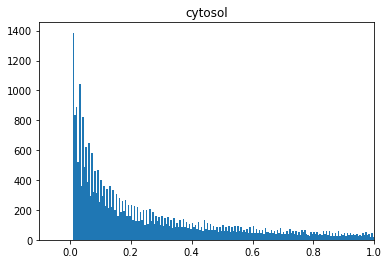

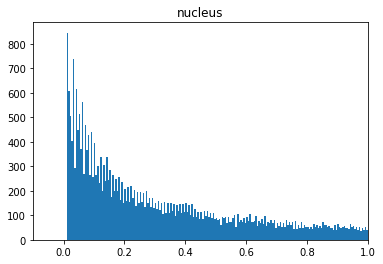

In [67]:
v_np = np.array(c_df["Value"])
# plt.hist(v_np, bins='auto')
plt.hist(v_np, bins=np.sort(np.array(c_df["Value"].unique())))
plt.xlim(-0.1, 1)
plt.title("cytosol")
plt.show()

v_np = np.array(n_df["Value"])
# plt.hist(v_np, bins='auto')
plt.hist(v_np, bins=np.sort(np.array(n_df["Value"].unique())))
plt.xlim(-0.1, 1)
plt.title("nucleus")
plt.show()

In [8]:
cnrci = df[df["Data Type"] == "CNRCI"]
cnrci = cnrci[cnrci["Value"].notna()]
cnrci = cnrci[cnrci["Coding Type"] == 'nc']
ensembl_id = cnrci["ENSEMBL ID"].unique()

In [9]:
cnrci#["Biotype"].unique()

,ENSEMBL ID,Data Source,Data Type,Value,Gene Name,Coding Type,Biotype
31474,ENSG00000082929,MCF.7,CNRCI,1.23491,LINC01587,nc,nc
39740,ENSG00000093100,A549,CNRCI,-3.15798,XXbac-B461K10.4,nc,nc
39741,ENSG00000093100,GM12878,CNRCI,-2.00351,XXbac-B461K10.4,nc,nc
39742,ENSG00000093100,H1.hESC,CNRCI,-2.21820,XXbac-B461K10.4,nc,nc
39743,ENSG00000093100,HeLa.S3,CNRCI,-2.05661,XXbac-B461K10.4,nc,nc
...,...,...,...,...,...,...,...
714484,ENSG00000283122,HepG2,CNRCI,-2.58496,HYMAI,nc,nc
714485,ENSG00000283122,HT1080,CNRCI,-1.48543,HYMAI,nc,nc
714487,ENSG00000283122,IMR.90,CNRCI,-3.30581,HYMAI,nc,nc
714494,ENSG00000283122,MCF.7,CNRCI,-3.54432,HYMAI,nc,nc


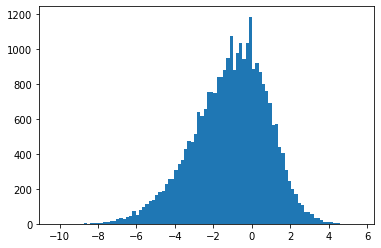

In [11]:
v_np = np.array(cnrci["Value"])
plt.hist(v_np, bins='auto')
# plt.xlim(-0.5, 10)
plt.show()

In [ ]:
variance = []
for eidx in ensembl_id:
    if len(cnrci[cnrci["ENSEMBL ID"] == eidx]["Value"]) > 1:
        variance.append(statistics.variance(cnrci[cnrci["ENSEMBL ID"] == eidx]["Value"]))

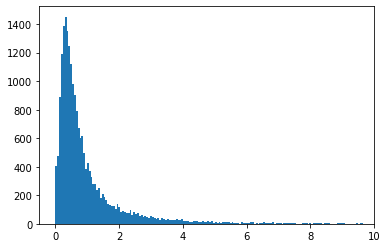

In [59]:
v_np = np.array(variance)
plt.hist(v_np, bins='auto')
plt.xlim(-0.5, 10)
plt.show()

In [21]:
nc_count = pd.DataFrame([], columns=["id", "N", "C"])
for eidx in ensembl_id:
    temp = pd.DataFrame([[eidx, len(cnrci[(cnrci["ENSEMBL ID"] == eidx) & (cnrci["Value"] > 0)]) , len(cnrci[(cnrci["ENSEMBL ID"] == eidx) & (cnrci["Value"] < 0)])]], columns=["id", "N", "C"])
    nc_count = nc_count.append(temp)
print(nc_count.head(10))

                id  N   C
0  ENSG00000082929  1   0
0  ENSG00000093100  0  15
0  ENSG00000099869  2   0
0  ENSG00000100181  1   4
0  ENSG00000116652  1   6
0  ENSG00000116883  0  10
0  ENSG00000117242  7   7
0  ENSG00000120055  4   1
0  ENSG00000120664  1   2
0  ENSG00000124915  0   2


In [30]:
nc_count["SUM"] = nc_count["N"] + nc_count["C"]
nc_count = nc_count[nc_count["SUM"] > 0]
nc_count["N/SUM"] = nc_count["N"] * (1 / nc_count["SUM"])
print(nc_count.head(5))

                id  N   C SUM     N/SUM
0  ENSG00000082929  1   0   1         1
0  ENSG00000093100  0  15  15         0
0  ENSG00000099869  2   0   2         1
0  ENSG00000100181  1   4   5       0.2
0  ENSG00000116652  1   6   7  0.142857


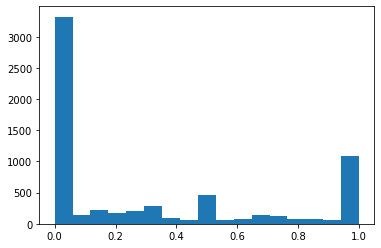

In [32]:
v_np = np.array(nc_count["N/SUM"])
plt.hist(v_np, bins='auto')
# plt.xlim(-0.5, 10)
plt.show()

In [16]:
nc_count = nc_count.groupby(by=["N", "C"]).count().reset_index()

In [17]:
h_m = np.zeros((15,15))

for n in range(15):
    for c in range(15):
        if len(nc_count[(nc_count["N"] == n) & (nc_count["C"] == c)]):
            h_m[n, c] = int(list(nc_count[(nc_count["N"] == n) & (nc_count["C"] == c)]["id"])[0])

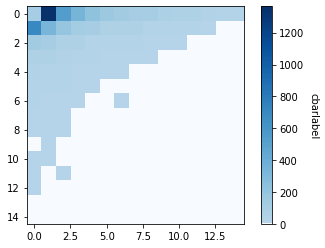

In [20]:
fig, ax = plt.subplots()
bottom = plt.cm.get_cmap('Blues', 128)
newcolors = np.vstack((bottom(0),
                       bottom(np.linspace(0.3, 1, 128))))
newcmp = matplotlib.colors.ListedColormap(newcolors, name='OrangeBlue')
im = ax.imshow(h_m, cmap=newcmp)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("cbarlabel", rotation=-90, va="bottom")
plt.show()

In [43]:
score_history = np.load("data/linear_features/score_history/score_history.npy")
# score_history = score_history[score_history[:, 3].argsort()]
score_history = pd.DataFrame(score_history, columns=["k", "power", "normalization", "acc", "f1_score_macro"])
print(score_history)
# score_history.to_csv("data/linear_features/score_history/dle_point_score_history_1123.csv", index=False)

      0     1    2         3
0   1.0   4.0  0.0  0.552361
1   1.0   4.0  1.0  0.577002
2   1.0   4.0  2.0  0.535934
3   1.0   4.0  3.0  0.542094
4   1.0   6.0  0.0  0.546201
..  ...   ...  ...       ...
59  4.0   8.0  3.0  0.924025
60  4.0  10.0  0.0  0.683778
61  4.0  10.0  1.0  0.882957
62  4.0  10.0  2.0  0.850103
63  4.0  10.0  3.0  0.928131

[64 rows x 4 columns]


In [2]:
df = pd.read_csv("data/linear_features/cdhit80_data_seq_loc75.csv")

In [3]:
data_x = df["Sequence"]
data_y = np.where(df["loc"].to_numpy() == "Cytosolic", 1, 0)

In [5]:
np.save("data/linear_features/data_y.npy", data_y)

In [4]:
x = np.load("data/linear_features/cdhit80_loc75_k1_power8_nor3.npy")
print(x.shape)

(2432, 37)


In [ ]:
x = None
for i in range(64):
    if x is None:
        x = np.array([data_x[:, i*10 + 4]]).T
        # x = np.array([data_x[:, i*10], data_x[:, i*10 + 9]]).T
        # x = np.array([np.average(data_x[:, i*10:(i+1)*10], axis=1)]).T
    else:
        x = np.append(x, np.array([data_x[:, i*10 + 4]]).T, axis=1)
        # x = np.append(x, np.array([data_x[:, i*10], data_x[:, i*10 + 9]]).T, axis=1)
        # x = np.append(x, np.array([np.average(data_x[:, i*10:(i+1)*10], axis=1)]).T, axis=1)
print(x.shape)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, data_y, test_size=0.20, shuffle=True, random_state=12)

In [6]:
print(np.unique(data_y, return_counts=True))
print(np.unique(y_train, return_counts=True))

(array([0, 1]), array([ 187, 2245]))
(array([0, 1]), array([ 147, 1798]))


In [6]:
clf = svm.SVC(kernel='linear', class_weight='balanced')
scores = cross_val_score(clf, x, data_y, cv=5, scoring='f1_macro')

In [7]:
print("score:", scores)
y_pred = clf.predict(x_test)
print("macro:", f1_score(y_test, y_pred, average='macro'))

score: [0.85343261 0.80478554 0.85592885 0.83167797 0.72709271]


NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [7]:
clf = svm.SVC(kernel='linear', C=1, class_weight='balanced').fit(x_train, y_train)
            
score = clf.score(x_test, y_test)
print("score:", score)
y_pred = clf.predict(x_test)
print("macro:", f1_score(y_test, y_pred, average='macro'))

score: 0.971252566735113
macro: 0.9175773694390716


In [8]:
print(np.unique(y_test, return_counts=True))
print(x_test[y_test == 1].shape)
print(x_test[y_test == 0].shape)
print(clf.score(x_test[y_test == 0], y_test[y_test == 0]))
print(clf.score(x_test[y_test == 1], y_test[y_test == 1]))
y_pred = clf.predict(x_test)
print("macro:", f1_score(y_test, y_pred, average='macro'))

(array([0, 1]), array([ 40, 447]))
(447, 37)
(40, 37)
1.0
0.9686800894854586
macro: 0.9175773694390716


In [10]:
import pickle
with open('data/k_mers/model/k1p8n3_svm.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [11]:
with open('data/k_mers/model/k1p8n3_svm.pickle', 'rb') as f:
    clf2 = pickle.load(f)
y_pred = clf2.predict(x_test)
print("macro:", f1_score(y_test, y_pred, average='macro'))

macro: 0.9175773694390716


In [39]:
import time
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn import metrics

from libsvm.svmutil import *
from imblearn.over_sampling import SMOTE

k_array = [1]
nor_array = [2]
num_array = [1]
k_array = [1, 2, 3, 4]
nor_array = [2, 3]
num_array = [1, 2, 3, 5, 8, 10]

data_y = np.load("data/linear_features/data_y.npy")

score_history = None
start_time = time.time()
for k in k_array:
    for nor in nor_array:
        for num in num_array:
            print("k=%s, nor=%s, num=%s" % (k, nor, num))
            
            data_x = np.load("data/linear_features/point/k" + str(k) + "nor" + str(nor) + "n" + str(num) + ".npy")
            data_x = data_x.reshape(data_x.shape[0],-1)
            print(data_x.shape)
            
            x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20, shuffle=True, random_state=12)
            
            prob = svm_problem(y_train, x_train, isKernel=True)
            param = svm_parameter('-t 0 -w0 1798 -w1 147')
            m = svm_train(prob, param)
            p_label, p_acc, p_val = svm_predict(y_test, x_test, m)
            (score, MSE, SCC) = evaluations(y_test, p_label)
            macro = f1_score(y_test, p_label, average='macro')
            print("score:", score)
            print("macro:", macro)
            print(metrics.confusion_matrix(y_test, p_label) / len(y_test))
            # if macro >= 0.6:
            #     with open("data/linear_features/model/k" + str(k) + "nor" + str(nor) + "n" + str(num) + "point_1122_" + str(start_time) + ".pickle", 'wb') as f:
            #         pickle.dump(clf, f)
            
            if score_history is None:
                score_history = np.array([[k, nor, num, data_x.shape[1], score, macro]])
            else:
                score_history = np.append(score_history, [[k, nor, num, data_x.shape[1], score, macro]], axis=0)
print(score_history)

k=1, nor=2, num=1
(2432, 4)
Accuracy = 41.0678% (200/487) (classification)
score: 41.067761806981515
macro: 0.3470721509821783
[[0.04928131 0.03285421]
 [0.55646817 0.3613963 ]]
k=1, nor=2, num=2
(2432, 8)
Accuracy = 66.7351% (325/487) (classification)
score: 66.73511293634496
macro: 0.44798488664987407
[[0.01848049 0.06365503]
 [0.26899384 0.64887064]]
k=1, nor=2, num=3
(2432, 12)
Accuracy = 29.7741% (145/487) (classification)
score: 29.774127310061605
macro: 0.2699610772143909
[[0.0513347  0.03080082]
 [0.67145791 0.24640657]]
k=1, nor=2, num=5
(2432, 20)
Accuracy = 19.3018% (94/487) (classification)
score: 19.301848049281315
macro: 0.1907117758242316
[[0.0698152  0.01232033]
 [0.79466119 0.12320329]]
k=1, nor=2, num=8
(2432, 32)
Accuracy = 13.1417% (64/487) (classification)
score: 13.141683778234087
macro: 0.13105045366538856
[[0.07597536 0.00616016]
 [0.862423   0.05544148]]
k=1, nor=2, num=10
(2432, 40)
Accuracy = 9.65092% (47/487) (classification)
score: 9.650924024640657
macro: 

In [38]:
from libsvm.svmutil import *
from imblearn.over_sampling import SMOTE

print(np.unique(y_train, return_counts=True))

# sm = SMOTE(random_state=42)
# x_res, y_res = sm.fit_resample(x_train, y_train)
# prob = svm_problem(y_res, x_res, isKernel=True)
prob = svm_problem(y_train, x_train, isKernel=True)
param = svm_parameter('-t 0 -w0 1798 -w1 147')
m = svm_train(prob, param)
p_label, p_acc, p_val = svm_predict(y_test, x_test, m)
print(f1_score(y_test, p_label, average='macro'))

(array([0, 1]), array([ 147, 1798]))
Accuracy = 41.0678% (200/487) (classification)
0.3470721509821783


In [11]:
from libsvm.svmutil import *
from imblearn.over_sampling import SMOTE

prob = svm_problem(data_y, x, isKernel=True)
param = svm_parameter('-v 10')
svm_train(prob, param)

Cross Validation Accuracy = 92.3109%


92.3108552631579

In [43]:
f_array = np.load("data/linear_features/k2_power10.npy")
vocab = np.load("data/linear_features/k2_vocab.npy")
print(f_array.shape)

(2432, 16, 11)


In [44]:
token_out = 10
data = []
for f in f_array:
    f_p = np.array([])
    for z in f:
        p = np.poly1d(z)
        f_p = np.append(f_p, p(np.linspace(0, 1.0, num=token_out)))
    data.append(f_p)
x = np.array(data)
print(x.shape)

(2432, 160)


In [52]:
k = 1
nor_str = "_norL"
data_df = pd.read_csv("data/linear_features/old/cdhit80_k" + str(k) + "_linear10" + nor_str + "_loc75.csv")
vocab = np.load("data/linear_features/old/cdhit80_k" + str(k) + "_vocab.npy")

In [31]:
col = data_df.columns
data_x = data_df[col[:-2]].to_numpy()
data_y = data_df[col[-1]].to_numpy()
data_y = np.where(data_y == "Cytosolic", 1, 0)

idx = np.arange(len(data_y))
np.random.shuffle(idx)
x_train = data_x[idx[:int(len(idx) * 0.8)]]
y_train = data_y[idx[:int(len(idx) * 0.8)]]
x_test = data_x[idx[int(len(idx) * 0.8):]]
y_test = data_y[idx[int(len(idx) * 0.8):]]
print(x_train.shape)
y_weight = np.unique(y_train, return_counts=True)[1]
print(y_weight)
print(x_test.shape)
print(np.unique(y_test, return_counts=True))

(1945, 176)
[ 142 1803]
(487, 176)
(array([0, 1]), array([ 38, 449]))


In [4]:
prob = svm_problem(y_train, x_train, isKernel=True)
param = svm_parameter('-t 1 -c 4 -w0 ' + str(y_weight[1]) + ' -w1 ' + str(y_weight[0]))
m = svm_train(prob, param)
p_label, p_acc, p_val = svm_predict(y_test, x_test, m)

NameError: name 'svm_problem' is not defined

In [32]:
preformance_vacab = []

for i in range(len(vocab)):
    x_v_train = x_train[:, 11*i:11*i+11]
    x_v_test = x_test[:, 11*i:11*i+11]
    # x_v_train = np.append(x_train[:, 11*i:11*i+11], np.array([x_train[:, -1]]).T, axis=1)
    # x_v_test = np.append(x_test[:, 11*i:11*i+11], np.array([x_test[:, -1]]).T, axis=1)
    # prob = svm_problem(y_train, x_train[:, 11*i:11*i+11], isKernel=True)
    # param = svm_parameter('-t 1 -c 10 -w0 ' + str(y_weight[1]) + ' -w1 ' + str(y_weight[0]))
    # m = svm_train(prob, param)
    # p_label, p_acc, p_val = svm_predict(y_test, x_test[:, 11*i:11*i+11], m)
    # f1 = f1_score(y_test, p_label, average=None)
    # print(f1)
    clf = svm.SVC(kernel='rbf', C=1, class_weight='balanced').fit(x_v_train, y_train)
    y_pred = clf.predict(x_v_test)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average=None)
    preformance_vacab.append([i, f1_macro, f1[0], f1[1]])
    # print("score:", clf.score(x_test[:, 11*i:11*i+11], y_test))
preformance_vacab = np.array(preformance_vacab)
preformance_vacab = preformance_vacab[np.argsort(preformance_vacab[:, 1])]

In [33]:
preformance_vacab[-5:]

array([[12.        ,  0.44893685,  0.17283951,  0.7250342 ],
       [11.        ,  0.44952274,  0.16806723,  0.73097826],
       [13.        ,  0.45393055,  0.15454545,  0.75331565],
       [ 1.        ,  0.48629033,  0.1761658 ,  0.79641485],
       [ 7.        ,  0.50354369,  0.16      ,  0.84708738]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20, shuffle=True, random_state=12)

In [22]:
value_counts = train_df["loc"].value_counts()

for i in range(len(value_counts)):
    while (max(value_counts) - value_counts[i]) / max(value_counts) > .1:
        print((max(value_counts) - value_counts[i]) / max(value_counts))
        train_df = train_df.append(train_df[train_df["loc"] == value_counts.index[i]][:(max(value_counts) - value_counts[i])])
        value_counts = train_df["loc"].value_counts()

print(value_counts)


0.9194444444444444
0.8388888888888889
0.6777777777777778
0.35555555555555557
Cytosolic    1800
Nucleus      1800
Name: loc, dtype: int64


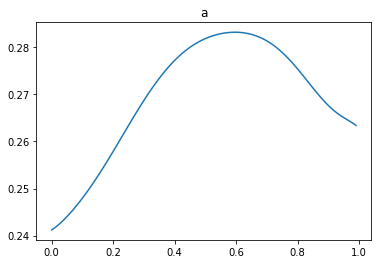

In [55]:
col = data_df.columns
cyt_df = data_df[data_df["loc"] == "Cytosolic"]
cyt_l = cyt_df.loc[:, ["len"]].to_numpy()
cyt_l = np.ones_like(cyt_l)

len_v = int((len(col)-2) / 11)

for i in range(len_v):
    for z, l in zip(cyt_df.loc[:, col[11*i:11*i+11]].to_numpy(), cyt_l):
        t = np.arange(0, l, 0.01)
        p = np.poly1d(z)

        plt.plot(t, p(t), alpha=1, color="#1f77b4")
        break
        
    # plt.xlim(0, np.average(cyt_l))
    plt.title(vocab[i])
    plt.show()
    break


[0.30459667 0.30563531 0.30480713 0.30405863 0.30499612 0.30685001
 0.30871487 0.3108631  0.31331082 0.31590429]


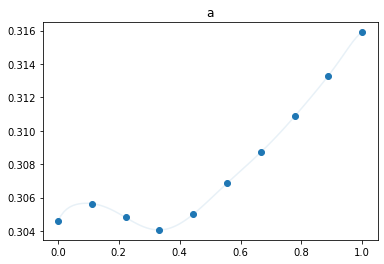

In [59]:
nuc_df = data_df[data_df["loc"] == "Nucleus"]
nuc_l = nuc_df.loc[:, ["len"]].to_numpy()
nuc_l = np.ones_like(nuc_l)
len_v = int((len(col)-2) / 11)

for i in range(len_v):
    for z, l in zip(nuc_df.loc[:, col[11*i:11*i+11]].to_numpy(), nuc_l):
        t = np.arange(0, l, 0.01)
        p = np.poly1d(z)

        plt.plot(t, p(t), alpha=0.1, color="#1f77b4")
        t = np.linspace(0, 1.0, num=10)
        plt.scatter(t, p(t))
        print(p(t))
        break
    # plt.xlim(0, 1)
    plt.title(vocab[i])
    plt.show()
    break

In [106]:
class NN2Layers(torch.nn.Module):
    def __init__(self, ninp: int, nhid: int, ntoken: int, dropout: float=0.0):
        
        super(NN2Layers, self).__init__()
        self.drop = nn.Dropout(dropout)
        self.nn1 = nn.Linear(ninp, nhid)
        self.nn2 = nn.Linear(nhid, ntoken)

        self.init_weights()

        self.ninp = ninp
        self.nhid = nhid
        self.ntoken = ntoken

    def init_weights(self):
        initrange = 0.1
        self.nn1.bias.data.zero_()
        self.nn1.weight.data.uniform_(-initrange, initrange)
        self.nn2.bias.data.zero_()
        self.nn2.weight.data.uniform_(-initrange, initrange)

    def forward(self, x: torch.tensor):

        output = self.nn1(x)
        output = self.drop(output)
        output = self.nn2(output)

        return output.softmax(dim=1)
 
    def predict(self, x: torch.tensor):
        # """預測並輸出機率大的類別

        # Args:
        #     x (torch.tensor): 詞 tensor。如果batch_first=True，input shape為（批次，序列），否則（序列，批次）。

        # Returns:
        #     [torch.tensor]: shape 與 x 一樣，但是序列為類別序列。
        # """
        output = self.forward(x)
        _, output = torch.max(output, 1)

        return output

In [151]:
x = x_train
y = y_train
# y = np.where(y == "Cytosolic" , 1, 0)

unique, counts = np.unique(y, return_counts=True)

y_weight = np.unique(y, return_counts=True)[1] / len(y)
y_weight = np.abs(y_weight - 1)
print(y_weight)

[0.92699229 0.07300771]


In [210]:
ntoken = 2

ninp = x_train.shape[1]
nhid = 512

model = NN2Layers(ninp, nhid, ntoken)
loss_fn = nn.CrossEntropyLoss(weight=torch.tensor(y_weight).to(torch.float))
# optimizer = optim.AdamW(model.parameters(), lr=3e-3, weight_decay=1e-4)
optimizer = optim.SGD(model.parameters(), lr=3e-1)

batch_size = 8
epochs = 500

tensor_x = torch.tensor(x_train).to(torch.float)
tensor_y = torch.tensor(y_train).to(torch.long)

test_x = torch.tensor(x_test).to(torch.float)
test_y = torch.tensor(y_test).to(torch.long)

# dataset = Data.TensorDataset(tensor_x, tensor_y)

# # train_set, valid_set = Data.random_split(dataset, [int(len(dataset) * 0.8), len(dataset) - int(len(dataset) * 0.8)], generator=torch.Generator().manual_seed(42))

# loader = Data.DataLoader(
#     dataset = dataset,
#     batch_size = batch_size,
# )

In [195]:
class Trainer():
    def __init__(self, model, optimizer, loss_fn):
        self.model = model
        self.optimizer = optimizer
        self.loss_fn = loss_fn
    
    def train(self, x, y, epochs = 2, batch_size = 1, epoch_print = True):
        train_dataset = Data.TensorDataset(x, y)
        loader = Data.DataLoader(
            dataset = train_dataset,
            batch_size = batch_size,
        )
        
        start_time = time.time()
        step_size = len(loader)
        for epoch in range(epochs):
            for step, (batch_x, batch_y) in enumerate(loader):
                step_time = time.time()
                
                self.optimizer.zero_grad()
                pred_y = self.model(batch_x)
                loss = self.loss_fn(pred_y, batch_y)
                loss.backward()
                self.optimizer.step()
                
                # print('Epoch: %i | Step: %i/%i | Loss: %.2f | time: %.2f s' % (epoch, step, step_size, loss, time.time() - step_time))
            if epoch_print:
                print('Epoch: %i | Loss: %.2f | time: %.2f s' % (epoch, loss, time.time() - step_time))
        print('All Time: %.2f s | Loss: %.2f' % (time.time() - start_time, loss))
    
    def test(self, x, y):
        y_pred = self.model.predict(x)
        
        one_hot_y = np.eye(self.model.ntoken)[y]
        one_hot_y_pred = np.eye(self.model.ntoken)[y_pred]
        token_acc_array = []
        for i in range(self.model.ntoken):
            y_token = torch.tensor(one_hot_y[:, i])
            y_pred_token = torch.tensor(one_hot_y_pred[:, i])
            
            tp = (y_token * y_pred_token).sum(dim=0).to(torch.float32)
            tn = ((1 - y_token) * (1 - y_pred_token)).sum(dim=0).to(torch.float32)
            fp = ((1 - y_token) * y_pred_token).sum(dim=0).to(torch.float32)
            fn = (y_token * (1 - y_pred_token)).sum(dim=0).to(torch.float32)
            precision = tp / (tp + fp)
            rec = tp / (tp + fn)
            f1 = 2 * rec * precision / (rec + precision)
            token_acc_array.append(f1)
        acc = (y_pred == y).float().sum() / len(y)
        token_acc_array = torch.tensor(token_acc_array)
        return acc, token_acc_array

In [ ]:
trainer = Trainer(model, optimizer, loss_fn)
trainer.train(tensor_x, tensor_y, epochs, batch_size, epoch_print=False)
trainer.test(test_x, test_y)

In [211]:
preformance_vacab = []
for i in range(len(vocab)):
    model = NN2Layers(11, nhid, ntoken)
    trainer = Trainer(model, optimizer, loss_fn)
    trainer.train(tensor_x[:, 11*i:11*i+11], tensor_y, epochs, batch_size, epoch_print=False)
    acc, token_acc_array = trainer.test(test_x[:10, 11*i:11*i+11], test_y[:10])
    
    preformance_vacab.append(np.append(np.array([i, acc, torch.min(token_acc_array)]), token_acc_array))
preformance_vacab = np.array(preformance_vacab)
preformance_vacab = preformance_vacab[np.argsort(preformance_vacab[:, 2])]

All Time: 43.67 s | Loss: 0.69
All Time: 42.74 s | Loss: 0.69
All Time: 43.57 s | Loss: 0.69
All Time: 44.38 s | Loss: 0.69
All Time: 44.36 s | Loss: 0.69
All Time: 43.77 s | Loss: 0.69
All Time: 43.93 s | Loss: 0.69
All Time: 43.48 s | Loss: 0.69
All Time: 43.79 s | Loss: 0.69
All Time: 44.10 s | Loss: 0.69
All Time: 43.94 s | Loss: 0.70
All Time: 43.93 s | Loss: 0.69
All Time: 43.86 s | Loss: 0.69
All Time: 44.28 s | Loss: 0.69
All Time: 44.88 s | Loss: 0.69
All Time: 45.26 s | Loss: 0.69


In [212]:
preformance_vacab

array([[ 0.        ,  0.1       ,         nan,  0.18181819,         nan],
       [ 1.        ,  0.89999998,         nan,         nan,  0.94736838],
       [ 2.        ,  0.1       ,         nan,  0.18181819,         nan],
       [ 3.        ,  0.1       ,         nan,  0.18181819,         nan],
       [ 4.        ,  0.89999998,         nan,         nan,  0.94736838],
       [ 5.        ,  0.89999998,         nan,         nan,  0.94736838],
       [ 6.        ,  0.89999998,         nan,         nan,  0.94736838],
       [ 7.        ,  0.89999998,         nan,         nan,  0.94736838],
       [ 8.        ,  0.89999998,         nan,         nan,  0.94736838],
       [ 9.        ,  0.89999998,         nan,         nan,  0.94736838],
       [10.        ,  0.1       ,         nan,  0.18181819,         nan],
       [11.        ,  0.89999998,         nan,         nan,  0.94736838],
       [12.        ,  0.1       ,         nan,  0.18181819,         nan],
       [13.        ,  0.89999998,     

In [52]:
start_time = time.time()
step_size = len(loader)
for epoch in range(epochs):
    correct = 0
    for step, (batch_x, batch_y) in enumerate(loader):
        step_time = time.time()
        model.zero_grad()
        pred = model(batch_x)
        loss = loss_fn(pred, batch_y)
        # print('Epoch: %i | Step: %i/%i | Loss: %.2f | time: %.2f s' % (epoch, step, step_size, loss, time.time() - step_time))
        loss.backward()
        optimizer.step()
        
        correct += (torch.argmax(pred, dim=1) == batch_y).float().sum()

    accuracy = 100 * correct / len(loader.dataset)
    print('Epoch: %i | Loss: %.2f | Accuracy: %.2f | time: %.2f s' % (epoch, loss, accuracy, time.time() - step_time))

print('all time : ', time.time() - start_time,'s')

Epoch: 0 | Loss: 0.67 | Accuracy: 91.57 | time: 0.01 s
Epoch: 1 | Loss: 0.65 | Accuracy: 92.19 | time: 0.00 s
Epoch: 2 | Loss: 0.62 | Accuracy: 92.19 | time: 0.00 s
Epoch: 3 | Loss: 0.59 | Accuracy: 92.19 | time: 0.00 s
Epoch: 4 | Loss: 0.56 | Accuracy: 92.19 | time: 0.00 s
Epoch: 5 | Loss: 0.52 | Accuracy: 92.19 | time: 0.00 s
Epoch: 6 | Loss: 0.49 | Accuracy: 92.19 | time: 0.00 s
Epoch: 7 | Loss: 0.46 | Accuracy: 92.19 | time: 0.00 s
Epoch: 8 | Loss: 0.44 | Accuracy: 92.19 | time: 0.00 s
Epoch: 9 | Loss: 0.42 | Accuracy: 92.19 | time: 0.00 s
Epoch: 10 | Loss: 0.40 | Accuracy: 92.19 | time: 0.00 s
Epoch: 11 | Loss: 0.39 | Accuracy: 92.19 | time: 0.00 s
Epoch: 12 | Loss: 0.38 | Accuracy: 92.19 | time: 0.00 s
Epoch: 13 | Loss: 0.37 | Accuracy: 92.19 | time: 0.00 s
Epoch: 14 | Loss: 0.36 | Accuracy: 92.19 | time: 0.00 s
Epoch: 15 | Loss: 0.35 | Accuracy: 92.19 | time: 0.00 s
Epoch: 16 | Loss: 0.35 | Accuracy: 92.19 | time: 0.00 s
Epoch: 17 | Loss: 0.34 | Accuracy: 92.19 | time: 0.00 s
Ep

KeyboardInterrupt: 

In [138]:
def valid(vaild_data):
    model.eval()
    with torch.no_grad():
        for step, (batch_x, batch_y) in enumerate(loader):
            pred = model(batch_x)
            print(pred.softmax(dim=1))
            print(pred)
            print(batch_y)
            break

valid_loader = Data.DataLoader(
    dataset = valid_set,
    batch_size = 5,
)
valid(valid_loader)

tensor([[0.7311, 0.2689],
        [0.7310, 0.2690],
        [0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.7310, 0.2690],
        [0.7305, 0.2695],
        [0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.7298, 0.2702],
        [0.7311, 0.2689]])
tensor([[1.0000e+00, 2.6870e-09],
        [9.9980e-01, 2.0265e-04],
        [1.0000e+00, 1.9828e-07],
        [1.0000e+00, 2.3776e-15],
        [9.9996e-01, 4.4885e-05],
        [9.9870e-01, 1.3012e-03],
        [1.0000e+00, 1.5889e-10],
        [9.9999e-01, 1.0258e-05],
        [9.9675e-01, 3.2475e-03],
        [1.0000e+00, 8.9727e-10]])
tensor([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])
